In [1]:
print("Hello World")

Hello World


### Basic ChatBot with Langgraph (GRAPH API)

In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]

In [3]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()

In [7]:
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C9C0xg8hZG4hv919aVrPWtzKGtlsy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6b91dadb-ccd8-489d-b990-c00382fef5e6-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
#Node Functionality 
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [9]:
graph_builder = StateGraph(State)

#adding nodes 
graph_builder.add_node("llmchatbot",chatbot)

#adding edges 
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

#Compile graph
graph = graph_builder.compile()

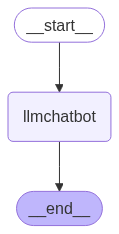

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
response = graph.invoke({"messages":"Hi"})

In [13]:
response

{'messeges': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='daf823e5-d1fc-4191-9d67-51e1a29bed74'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C9CKBRzwnbgxlmAlvy3IqjkCUmDJY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e1366d37-72a4-42d8-a9db-e4395b1c807f-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [ ]:
response['messages'][-1].content

'Hello! How can I assist you today?'

In [ ]:
response = graph.invoke({"messages":"what is apple"})

In [20]:
response

{'messeges': [HumanMessage(content='what is apple', additional_kwargs={}, response_metadata={}, id='adfe8e00-df6d-4239-a2b1-19258b9dbaf0'),
  AIMessage(content='Apple is a multinational technology company that designs, develops, and sells consumer electronics, software, and online services. They are best known for their products such as the iPhone, iPad, Mac computers, and Apple Watch, as well as their software like iOS, macOS, and iCloud. Apple was founded in 1976 by Steve Jobs, Steve Wozniak, and Ronald Wayne and is headquartered in Cupertino, California.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 10, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C9CLCc97gi

In [5]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)

In [6]:
dic = tool.invoke("What is agentic ai?")

In [7]:
dic['results'][-1]['content']

'Agentic AI is an AI system that acts autonomously, adapts in real time, and solves multi-step problems based on context and objectives.'

In [6]:
## Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [7]:
tools = [tool, multiply]

In [8]:
llm_with_tool = llm.bind_tools(tools)

In [9]:
llm_with_tool

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000029D92BE7050>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000029D93124490>, root_client=<openai.OpenAI object at 0x0000029D92BF8890>, root_async_client=<openai.AsyncOpenAI object at 0x0000029D9310BF50>, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'incl

In [10]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [11]:
## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

In [12]:
## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)

In [13]:
graph = builder.compile()

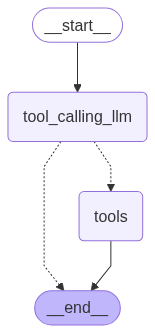

In [14]:
from IPython.display import Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
response=graph.invoke({"messages":"What is the recent ai news"})

In [16]:
response

{'messages': [HumanMessage(content='What is the recent ai news', additional_kwargs={}, response_metadata={}, id='35872087-a2af-4366-bfc7-d2022dd968f6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6ctKB5WxRdETYMf4uApQwmgz', 'function': {'arguments': '{"query":"latest AI news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 1372, 'total_tokens': 1399, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C9rXBCmSt873rDxEMioqtP05p8Q2M', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5664e7ae-f0a7-4990-834d-8c9c951ad40c-0', tool_calls=[{'name': 'tavily_search'

In [17]:
response['messages'][-1].content

'{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.rcrwireless.com/20250827/analyst-angle/ai-growth-bubble-analyst", "title": "Kagan: Some say we’re in AI growth bubble (Analyst Angle) - RCR Wireless", "score": 0.6894943, "published_date": "Wed, 27 Aug 2025 15:57:13 GMT", "content": "We can see the current Artificial Intelligence growth cycle is rapid and healthy. This latest growth jump began a couple years ago with the introduction of ChatGPT from OpenAI.\\n\\nSince that time, billions of dollars have been invested by companies and industries. The AI industry is rapidly expanding into different sectors like GenAI. Each sector does something different.\\n\\nJust consider how AI companies like Nvidia are rapidly growing, worldwide, in all these different sectors.", "raw_content": null}, {"url": "https://www.consultancy.eu/news/12083/europe-behind-us-in-ai-arms-race-accenture-report", "title": "Europe behind US in AI 

In [18]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent ai news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_6ctKB5WxRdETYMf4uApQwmgz)
 Call ID: call_6ctKB5WxRdETYMf4uApQwmgz
  Args:
    query: latest AI news
    search_depth: advanced
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.rcrwireless.com/20250827/analyst-angle/ai-growth-bubble-analyst", "title": "Kagan: Some say we’re in AI growth bubble (Analyst Angle) - RCR Wireless", "score": 0.6894943, "published_date": "Wed, 27 Aug 2025 15:57:13 GMT", "content": "We can see the current Artificial Intelligence growth cycle is rapid and healthy. This latest growth jump began a couple years ago with the introduction of ChatGPT from OpenAI.\

In [19]:
response=graph.invoke({"messages":"What is 5 multiplied by 2"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 2
================================== Ai Message ==================================
Tool Calls:
  multiply (call_PdIh1XlBgveo9E2zL7Yyo8Qo)
 Call ID: call_PdIh1XlBgveo9E2zL7Yyo8Qo
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: multiply

10


In [21]:
response = graph.invoke({"messages":"What is 5 multiply 3 and then multiply by 2"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiply 3 and then multiply by 2
================================== Ai Message ==================================
Tool Calls:
  multiply (call_YDDcWs8JT69V5YmhBRbQvScJ)
 Call ID: call_YDDcWs8JT69V5YmhBRbQvScJ
  Args:
    a: 5
    b: 3
  multiply (call_t7Qnjz0ITy4Fsoa0q3unc2rC)
 Call ID: call_t7Qnjz0ITy4Fsoa0q3unc2rC
  Args:
    a: 15
    b: 2
================================= Tool Message =================================
Name: multiply

15
================================= Tool Message =================================
Name: multiply

30


In [20]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_nZ4Bm4I6xJWzeqVJ6Bwii1bL)
 Call ID: call_nZ4Bm4I6xJWzeqVJ6Bwii1bL
  Args:
    query: recent AI news
    search_depth: advanced
    include_images: False
  multiply (call_Y2KPlcyeqPHt6GeDVUImz42D)
 Call ID: call_Y2KPlcyeqPHt6GeDVUImz42D
  Args:
    a: 5
    b: 10
================================= Tool Message =================================
Name: tavily_search

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://techcrunch.com/category/artificial-intelligence/", "title": "AI News & Artificial Intelligence | TechCrunch", "content": "### From streaming to healthcare to AI, Mark Cuban reveals his ‘disruption formula’\n\nAI Chip technology concept. 3D render Etched, Artificial Int

### ReAct Agent Architecture

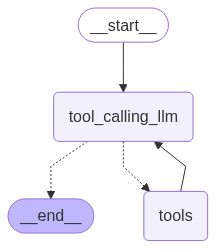

In [22]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_Hdlo2rDEWqzLJNW1jEXYsZgz)
 Call ID: call_Hdlo2rDEWqzLJNW1jEXYsZgz
  Args:
    query: recent AI news
    search_depth: advanced
    topic: news
  multiply (call_o7T7w5hlBIUMXewpkCpDjYTE)
 Call ID: call_o7T7w5hlBIUMXewpkCpDjYTE
  Args:
    a: 5
    b: 10
================================= Tool Message =================================
Name: tavily_search

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.forbes.com/sites/bernardmarr/2025/08/25/7-great-ai-hopes-that-could-change-the-world/", "title": "7 Great AI Hopes That Could Change The World - Forbes", "score": 0.7522497, "published_date": "Mon, 25 Aug 2025 06:27:17 GMT", "content": "This year, Google DeepMind’s Demis Has

### Adding Memory In Agentic Graph

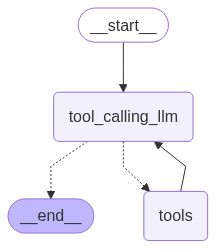

In [33]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
config = {"configurable":{"thread_id":"1"}}

response = graph.invoke({"messages":"Hi my name is pasindu"}, config=config)

In [35]:
response['messages'][-1].content

'Hello Pasindu! How can I assist you today?'

In [36]:
response = graph.invoke({"messages":"What is my name?"}, config=config)
response['messages'][-1].content

'Your name is Pasindu. How can I assist you, Pasindu?'